Health Insurance is a type of insurance that covers medical expenses. A person who has taken a health insurance policy gets health insurance cover by paying a particular premium amount. There are a lot of factors that determine the premium of health insurance.

In [16]:
import numpy as np    # imports the numpy library as np
import pandas as pd    # imports the pandas library as pd
data = pd.read_csv("Health_insurance.csv")    # reads the csv file into a pandas DataFrame
data.head()    # displays the first 5 rows of the DataFrame

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
data.shape  # displays the number of rows and columns in the DataFrame

(1338, 7)

In [18]:
data.info()    # displays information about the DataFrame, including data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
data.dtypes     # displays the data types of each column

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [20]:
data.describe(include="all")     # displays descriptive statistics of the DataFrame, including all columns

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [21]:
data.isnull().sum()     # displays the number of missing values in each column

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [22]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "sex", color = "smoker", title= "Number of Smokers")      # creates a histogram of the 'sex' column, colored by 'smoker'
figure.show()     # displays the histogram

According to the above visualisation, 547 females, 517 males don’t smoke, and 115 females, 159 males do smoke. It is important to use this feature while training a machine learning model, so now I will replace the values of the “sex” and “smoker” columns with 0 and 1 as both these columns contain string values:

In [23]:
data["sex"] = data["sex"].map({"female": 0, "male": 1})     # replaces string values in the 'sex' column with numerical values
data["smoker"] = data["smoker"].map({"no": 0, "yes": 1})     # replaces string values in the 'smoker' column with numerical values
print(data.head())     # displays the first 5 rows of the modified DataFrame

   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


In [24]:
import plotly.express as px
pie = data["region"].value_counts()    # counts the occurrences of each value in the 'region' column
regions = pie.index                # gets the unique values from the 'region' column
population = pie.values                # gets the corresponding counts of the unique values
fig = px.pie(data, values=population, names=regions)      # creates a pie chart of the regions and their population
fig.show()     # displays the pie chart

In [25]:
data.drop(columns=["region"], axis=1, inplace=True, errors='ignore')
print(data.head())

   age  sex     bmi  children  smoker      charges
0   19    0  27.900         0       1  16884.92400
1   18    1  33.770         1       0   1725.55230
2   28    1  33.000         3       0   4449.46200
3   33    1  22.705         0       0  21984.47061
4   32    1  28.880         0       0   3866.85520


In [26]:
print(data.corr())

               age       sex       bmi  children    smoker   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251
charges   0.299008  0.057292  0.198341  0.067998  0.787251  1.000000


# Split data into training and testing sets

In [27]:
x = np.array(data[["age", "sex", "bmi", "smoker"]])   # Features used for prediction
y = np.array(data["charges"])                          # Target variable (insurance charges)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model

In [28]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(xtrain, ytrain)

RandomForestRegressor()

# Evaluate the model using Mean Squared Error (MSE) and R-squared

Mean Squared Error: 24135066.876901846
R-squared: 0.8445393618035407


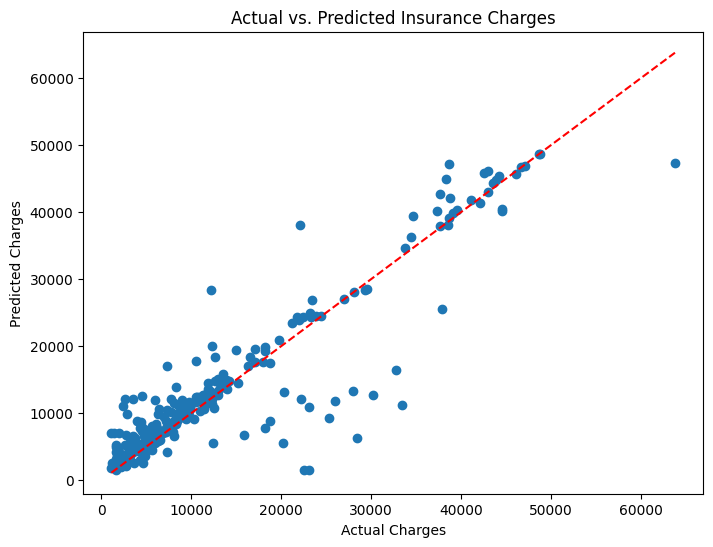

In [29]:

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize predicted vs actual charges
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Insurance Charges")
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--') # Add diagonal line
plt.show()

In [30]:
ypred = forest.predict(xtest)
data = pd.DataFrame(data={"Predicted Premium Amount": ypred})
print(data.head())

   Predicted Premium Amount
0              10649.690177
1               5452.408759
2              28471.820504
3               9904.010333
4              34646.549731


# Key Insights in Actual vs. Predicted Insurance Charges:
### Positive Correlation:
- The points generally align along the red diagonal line, indicating a positive correlation between the actual and predicted values. This suggests the model is performing well in predicting the charges.

### Model Accuracy:
- The closer the points are to the red line (y = x), the better the model's predictions. In this chart:

Many points are close to the line, suggesting accurate predictions.
Some points deviate significantly, indicating areas where the model's predictions are less accurate (possible outliers).
### Outliers:

- A few points are far from the red line, especially at higher charge values. These might represent outliers or cases where the model struggles to predict accurately.
These could result from data issues (e.g., skewed data, insufficient training) or complexity in the target variable.

### Prediction Range:

- The predicted values cover a wide range, matching the actual charge range (approximately 0–60,000). This indicates the model has captured the variability in the data to some extent.


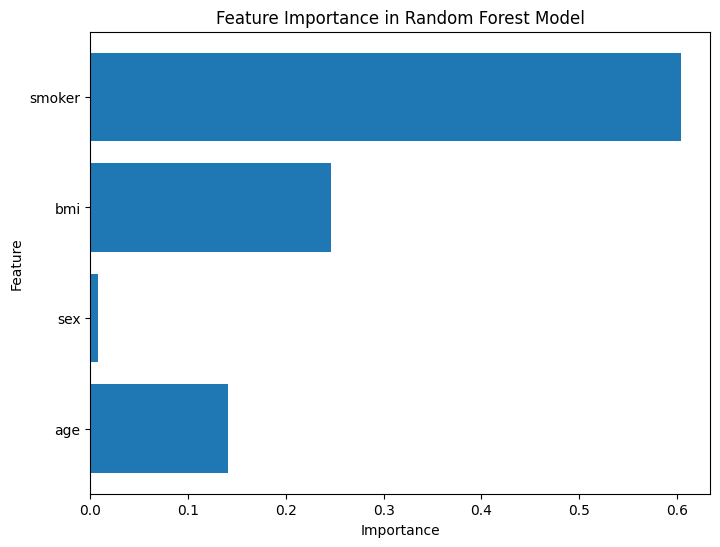

In [31]:
# Feature Importance
importances = forest.feature_importances_
feature_names = ["age", "sex", "bmi", "smoker"]  # Match feature names
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.show()

## From the chart depicting feature importance in a Random Forest model, the numerical insights are as follows:

- Smoker: The feature "smoker" has the highest importance, contributing approximately 0.6 (60%) to the model's decisions.
- BMI: The feature "bmi" is the second most significant, contributing approximately 0.25 (25%) to the model.
- Age: The feature "age" contributes about 0.1 (10%) to the model.
- Sex: The feature "sex" has the least importance, contributing less than 0.05 (5%) to the model.
This indicates that whether someone is a smoker or not is the most critical factor in this model, followed by BMI, with age and sex playing smaller roles.

 # Insights

## 1. Smoker Distribution by Gender:
##    - Approximately 547 females and 517 males are non-smokers.
##    - Approximately 115 females and 159 males are smokers.  This suggests a slightly higher proportion of male smokers in the dataset.

# 2. Regional Distribution:
##    - The code generates a pie chart showing the distribution of individuals across different regions.  The exact proportions for each region are not directly printed in the provided code output, but the chart itself provides this information visually.

# 3. Correlation Analysis:
##   - The `data.corr()` output shows the correlation coefficients between numerical features in the dataset. The code doesn't explicitly print the correlation matrix, but it calculates and displays them.  Look at the output of `print(data.corr())` to get precise values.  These values will provide insight into linear relationships between features like age, sex, BMI, smoker status, and charges.  For example, a positive correlation between BMI and charges suggests that as BMI increases, insurance charges tend to increase.

# 4. Model Performance Metrics:
##    - Mean Squared Error (MSE):  The code calculates and prints the MSE.  Lower values of MSE indicate a better fit between the predicted and actual charges.  
#    - R-squared:
## The code calculates and prints the R-squared score.  This metric represents the proportion of the variance in the dependent variable (charges) that is predictable from the independent variables (age, sex, bmi, smoker).  Higher R-squared values (closer to 1) indicate better model performance.

# 5. Feature Importance:
##    - A bar chart visualizes the feature importance from the Random Forest model.  The code prints the relative importance of age, sex, bmi, and smoker status in predicting insurance charges. The barplot helps determine which features most influence the model's predictions.  For example, if "smoker" has a high importance score, it suggests that smoker status is a strong predictor of insurance charges.

 # Summary